In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
import matplotlib.pyplot as plt


In [ ]:
spam_data = pd.read_csv("spam.csv",encoding="ISO-8859-1")

In [ ]:
print(spam_data)

        v1                                                 v2 Unnamed: 2  \
0      ham  Go until jurong point, crazy.. Available only ...        NaN   
1      ham                      Ok lar... Joking wif u oni...        NaN   
2     spam  Free entry in 2 a wkly comp to win FA Cup fina...        NaN   
3      ham  U dun say so early hor... U c already then say...        NaN   
4      ham  Nah I don't think he goes to usf, he lives aro...        NaN   
...    ...                                                ...        ...   
5567  spam  This is the 2nd time we have tried 2 contact u...        NaN   
5568   ham              Will Ì_ b going to esplanade fr home?        NaN   
5569   ham  Pity, * was in mood for that. So...any other s...        NaN   
5570   ham  The guy did some bitching but I acted like i'd...        NaN   
5571   ham                         Rofl. Its true to its name        NaN   

     Unnamed: 3 Unnamed: 4  
0           NaN        NaN  
1           NaN        NaN  


In [ ]:
spam_data = spam_data.where((pd.notnull(spam_data)),'')

In [ ]:
spam_data.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",,,
1,ham,Ok lar... Joking wif u oni...,,,
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,,,
3,ham,U dun say so early hor... U c already then say...,,,
4,ham,"Nah I don't think he goes to usf, he lives aro...",,,


In [ ]:
spam_data.shape

(5572, 5)

In [ ]:
spam_data.loc[spam_data['v1'] == 'spam', 'v1',] = 0
spam_data.loc[spam_data['v2'] == 'ham', 'v2',] = 1

In [ ]:
X = spam_data['v1']

Y = spam_data['v2']

In [ ]:
print(X)

0       ham
1       ham
2         0
3       ham
4       ham
       ... 
5567      0
5568    ham
5569    ham
5570    ham
5571    ham
Name: v1, Length: 5572, dtype: object


In [ ]:
print(Y)

0       Go until jurong point, crazy.. Available only ...
1                           Ok lar... Joking wif u oni...
2       Free entry in 2 a wkly comp to win FA Cup fina...
3       U dun say so early hor... U c already then say...
4       Nah I don't think he goes to usf, he lives aro...
                              ...                        
5567    This is the 2nd time we have tried 2 contact u...
5568                Will Ì_ b going to esplanade fr home?
5569    Pity, * was in mood for that. So...any other s...
5570    The guy did some bitching but I acted like i'd...
5571                           Rofl. Its true to its name
Name: v2, Length: 5572, dtype: object


In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=3)

In [ ]:
print(X.shape)
print(X_train.shape)
print(X_test.shape)

(5572,)
(4457,)
(1115,)


In [ ]:
feature_extraction = TfidfVectorizer(min_df=1, stop_words='english')

# Convert the input data to string format
X_train = X_train.astype(str)
X_test = X_test.astype(str)

# Perform feature extraction on the training data
X_train_features = feature_extraction.fit_transform(X_train)

# Perform feature extraction on the testing data
X_test_features = feature_extraction.transform(X_test)


In [ ]:
print(X_train)

3075    ham
1787    ham
1614    ham
4304    ham
3266    ham
       ... 
789     ham
968     ham
1667    ham
3321    ham
1688    ham
Name: v1, Length: 4457, dtype: object


In [ ]:
print(X_train_features)

  (0, 0)	1.0
  (1, 0)	1.0
  (2, 0)	1.0
  (3, 0)	1.0
  (4, 0)	1.0
  (5, 0)	1.0
  (6, 0)	1.0
  (8, 0)	1.0
  (9, 0)	1.0
  (10, 0)	1.0
  (12, 0)	1.0
  (14, 0)	1.0
  (15, 0)	1.0
  (16, 0)	1.0
  (17, 0)	1.0
  (18, 0)	1.0
  (19, 0)	1.0
  (20, 0)	1.0
  (21, 0)	1.0
  (22, 0)	1.0
  (23, 0)	1.0
  (24, 0)	1.0
  (25, 0)	1.0
  (26, 0)	1.0
  (27, 0)	1.0
  :	:
  (4430, 0)	1.0
  (4431, 0)	1.0
  (4432, 0)	1.0
  (4433, 0)	1.0
  (4434, 0)	1.0
  (4435, 0)	1.0
  (4436, 0)	1.0
  (4437, 0)	1.0
  (4438, 0)	1.0
  (4439, 0)	1.0
  (4441, 0)	1.0
  (4442, 0)	1.0
  (4443, 0)	1.0
  (4444, 0)	1.0
  (4445, 0)	1.0
  (4446, 0)	1.0
  (4447, 0)	1.0
  (4448, 0)	1.0
  (4449, 0)	1.0
  (4451, 0)	1.0
  (4452, 0)	1.0
  (4453, 0)	1.0
  (4454, 0)	1.0
  (4455, 0)	1.0
  (4456, 0)	1.0


In [ ]:
mnb=MultinomialNB()
mnb.fit(X_train_features, Y_train)




MultinomialNB()

In [ ]:
prediction_on_training_data = mnb.predict(X_train_features)
accuracy_on_training_data = accuracy_score(Y_train, prediction_on_training_data)

In [ ]:
print('Accuracy on training data : ', accuracy_on_training_data)

Accuracy on training data :  0.0053847879739735245


In [ ]:
input_mail = ["I've been searching for the right words to thank you for this breather. I promise i wont take your help for granted and will fulfil my promise. You have been wonderful and a blessing at all times"]

input_data_features = feature_extraction.transform(input_mail)



prediction = mnb.predict(input_data_features)
print(prediction)


if (prediction[0]==1):
  print('Ham mail')

else:
  print('Spam mail')

["Sorry, I'll call later"]
Spam mail


**LOGISTIC** **REGRESSION**

In [ ]:
model = LogisticRegression()

In [ ]:
model.fit(X_train_features, Y_train)

LogisticRegression()

In [ ]:

prediction_on_training_data = model.predict(X_train_features)
accuracy_on_training_data = accuracy_score(Y_train, prediction_on_training_data)

In [ ]:
print('Accuracy on training data : ', accuracy_on_training_data)

Accuracy on training data :  0.006282252636302446


In [ ]:
prediction_on_test_data = model.predict(X_test_features)
accuracy_on_test_data = accuracy_score(Y_test, prediction_on_test_data)

In [ ]:
print('Accuracy on test data : ', accuracy_on_test_data)

Accuracy on test data :  0.0053811659192825115


DECISSION TREE

In [ ]:
model =DecisionTreeClassifier()

In [ ]:
clf = DecisionTreeClassifier()
clf.fit(X_train_features, Y_train)

DecisionTreeClassifier()

In [ ]:
prediction_on_training_data = clf.predict(X_train_features)
accuracy_on_training_data = accuracy_score(Y_train, prediction_on_training_data)

In [ ]:
print('Accuracy on training data : ', accuracy_on_training_data)

Accuracy on training data :  0.006282252636302446


In [ ]:
prediction_on_test_data = clf.predict(X_test_features)
accuracy_on_test_data = accuracy_score(Y_test, prediction_on_test_data)

In [ ]:
print('Accuracy on test data : ', accuracy_on_test_data)

Accuracy on test data :  0.967713004484305


**COMPARISSION TREE**

In [ ]:
mnb = MultinomialNB()
mnb.fit(X_train_features, Y_train)
lr = LogisticRegression()
lr.fit(X_train_features, Y_train)
dt = DecisionTreeClassifier()
dt.fit(X_train_features, Y_train)

DecisionTreeClassifier()

In [ ]:
y_pred_mnb = mnb.predict(X_test_features)
y_pred_lr = lr.predict(X_test_features)
y_pred_dt = dt.predict(X_test_features)

In [ ]:
acc_mnb = accuracy_score(Y_test, y_pred_mnb)
acc_lr = accuracy_score(Y_test, y_pred_lr)
acc_dt = accuracy_score(Y_test, y_pred_dt)

In [ ]:
plt.bar(['MNB', 'LR', 'DT'], [acc_mnb, acc_lr, acc_dt])
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Comparison Graph')
plt.show()

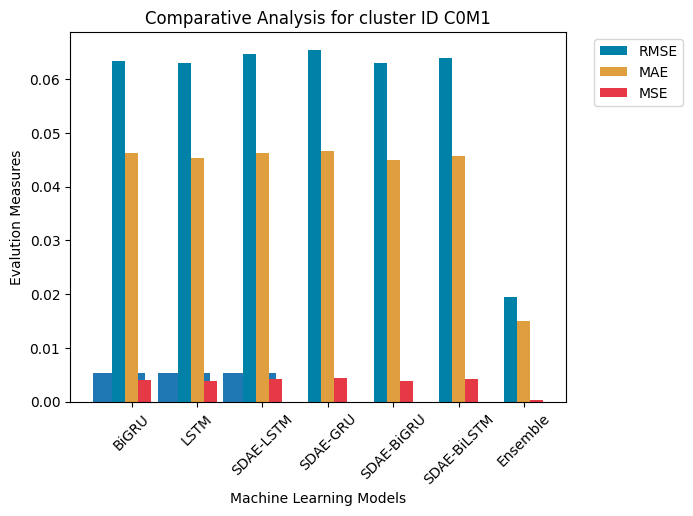

In [49]:
# Define model names and error metrics
models = ["BiGRU", "LSTM", "SDAE-LSTM", "SDAE-GRU", "SDAE-BiGRU", "SDAE-BiLSTM", "Ensemble"]
rmse = [0.0633, 0.0629, 0.0646, 0.0655, 0.0629, 0.064, 0.0194]
mae = [0.0463, 0.0453, 0.0462, 0.0466, 0.0450, 0.0457, 0.0149]
mse = [0.0040, 0.0039, 0.0041, 0.0043, 0.0039, 0.0041, 0.0003]

plt.bar(['MNB', 'LR', 'DT'], [acc_mnb, acc_lr, acc_dt])
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Comparison Graph')

# Set the width of the bars
width = 0.2

# Set the positions of the bars
x1 = np.arange(len(models))
x2 = [x + width for x in x1]
x3 = [x + width for x in x2]

#plt.figure(figsize=(10, 15))

# Plot the bars
plt.bar(x1, rmse, width=width, color="#0081a7", label="RMSE")
plt.bar(x2, mae, width=width, color="#e09f3e", label="MAE")
plt.bar(x3, mse, width=width, color="#e63946", label="MSE")

# Add labels and title
plt.xlabel("Machine Learning Models")
plt.ylabel("Evalution Measures")
plt.title("Comparative Analysis for cluster ID C0M1")
plt.xticks(x2, models, rotation=45)
#plt.xticks(x2, models)
plt.legend(loc="upper right", bbox_to_anchor=(1.25, 1))

# Show the plot
plt.show()